In [6]:
# Import necessary libraries
import pandas as pd
import pyspark.sql.functions as F
from pyspark.sql import SparkSession
from kedro.io import DataCatalog
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [4]:
# Load datasets
conditions_df = catalog.load("conditions")
print("conditions data loaded..")

[07/20/24 14:04:51] INFO     Loading data from conditions (ExcelDataset)...                     ]8;id=442624;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=826894;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#508\508]8;;\

conditions data loaded..


In [6]:
# 1. Display Basic Information
def basic_info(df):
    print("Dataset Shape:", df.shape)
    print("\nColumn Names:", df.columns)
    print("\nData Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nDuplicate Records:", df.duplicated().sum())

basic_info(conditions_df)

Dataset Shape: (4149, 6)

Column Names: Index(['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION'], dtype='object')

Data Types:
 START           object
STOP           float64
PATIENT         object
ENCOUNTER       object
CODE             int64
DESCRIPTION     object
dtype: object

Missing Values:
 START             0
STOP           4149
PATIENT           0
ENCOUNTER         0
CODE              0
DESCRIPTION       0
dtype: int64

Duplicate Records: 0


In [7]:
# 2. Summary Statistics
def summary_statistics(df):
    print("\nSummary Statistics:\n", df.describe(include='all'))

summary_statistics(conditions_df)



Summary Statistics:
              START  STOP                               PATIENT  \
count         4149   0.0                                  4149   
unique        2532   NaN                                  2784   
top     2017-11-05   NaN  BAB26CF7-22F4-F711-1D7A-ED56D5DA5B4E   
freq             7   NaN                                     2   
mean           NaN   NaN                                   NaN   
std            NaN   NaN                                   NaN   
min            NaN   NaN                                   NaN   
25%            NaN   NaN                                   NaN   
50%            NaN   NaN                                   NaN   
75%            NaN   NaN                                   NaN   
max            NaN   NaN                                   NaN   

                                   ENCOUNTER          CODE  \
count                                   4149  4.149000e+03   
unique                                  2784           NaN   

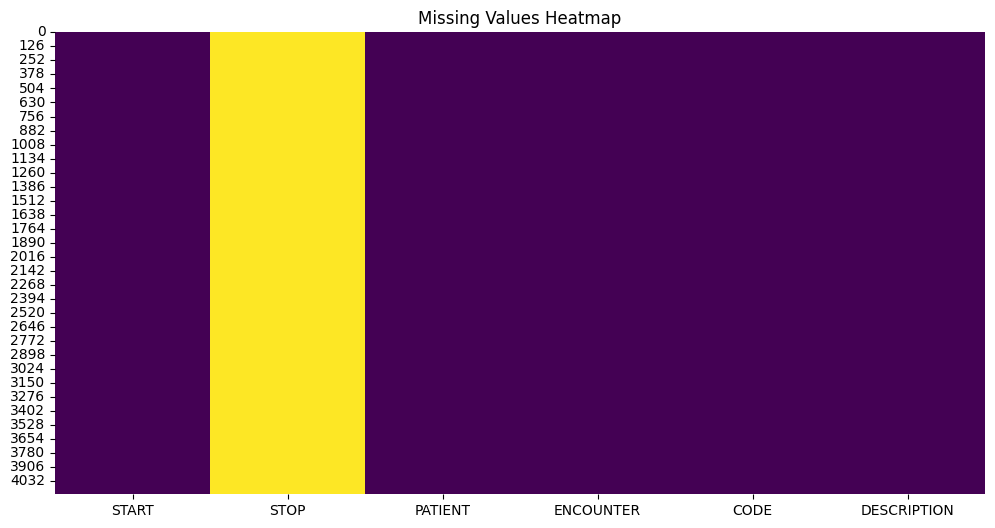

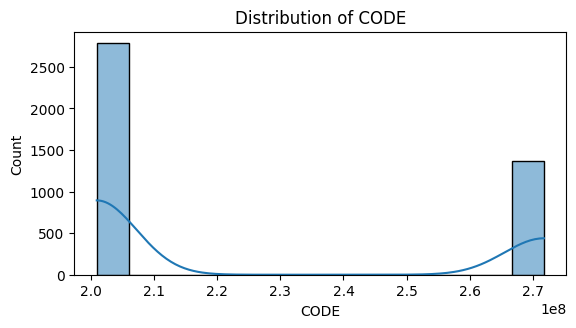

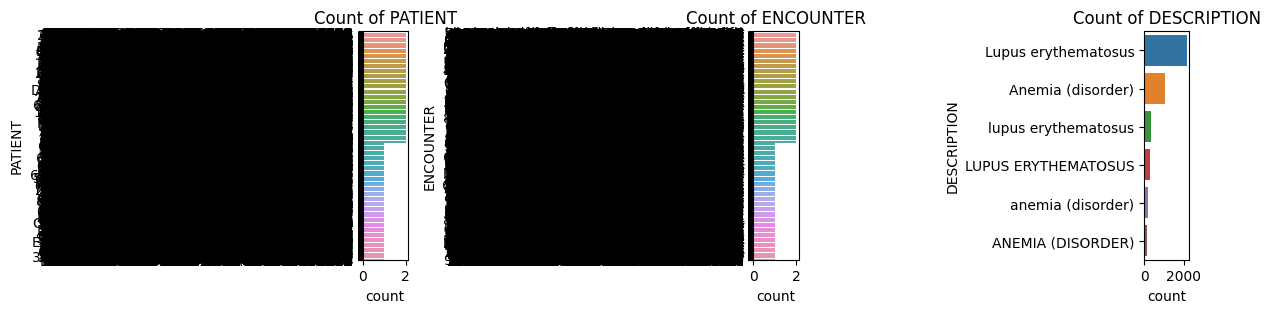

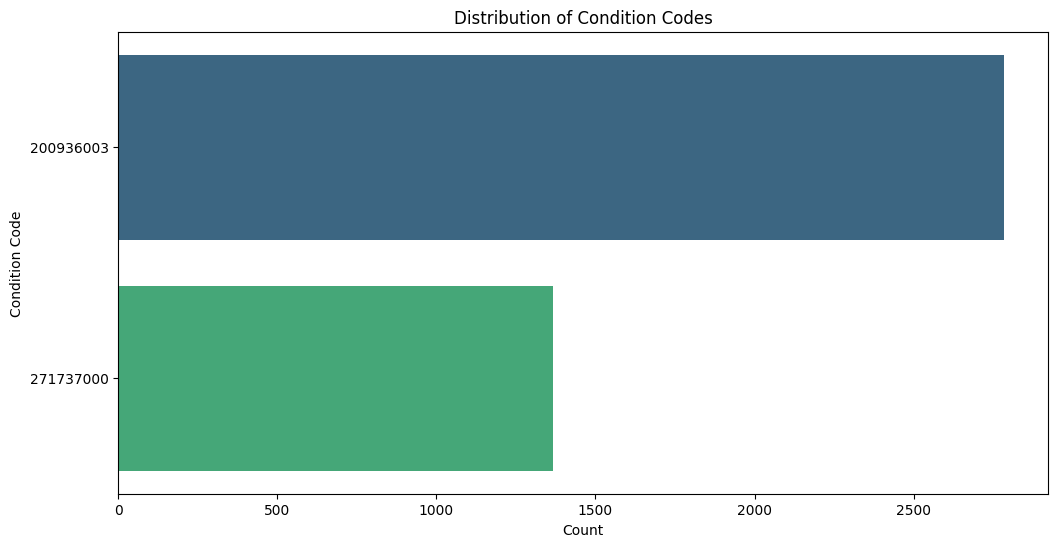

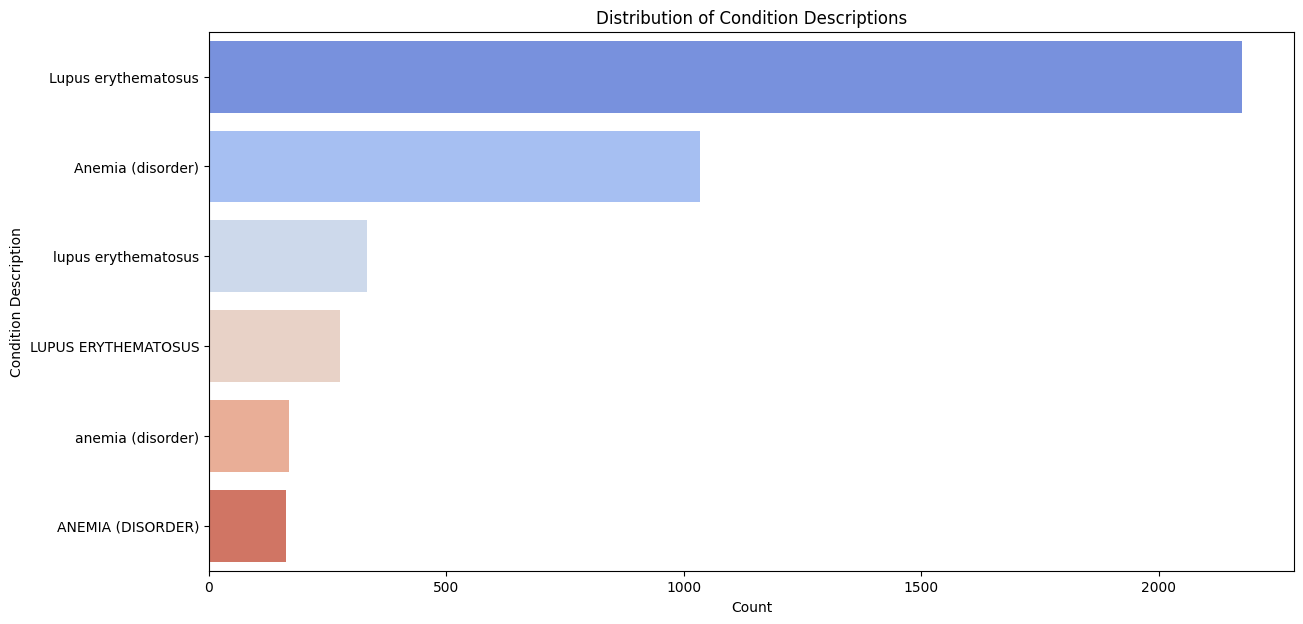

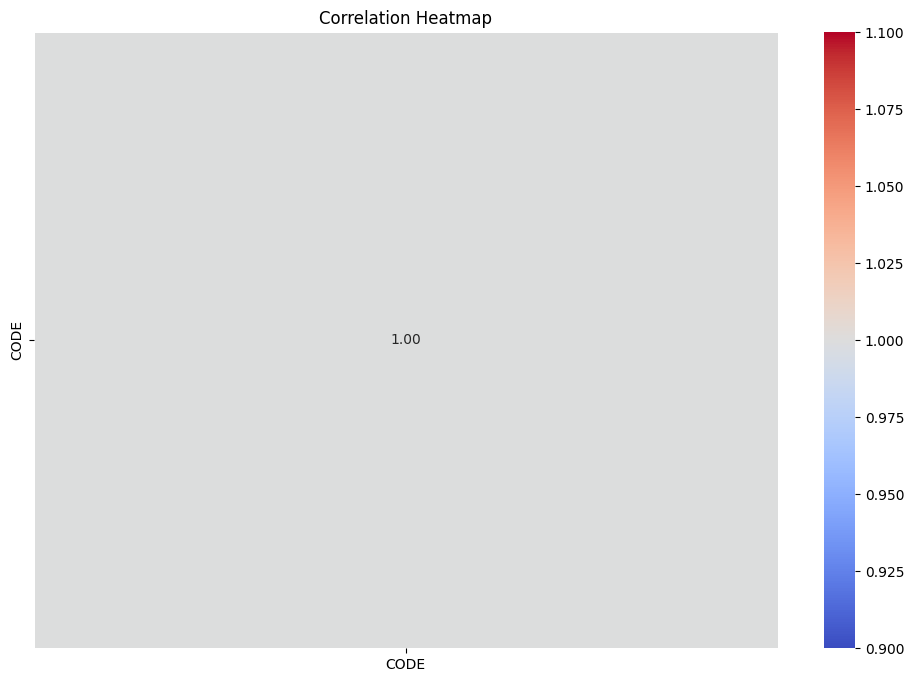

In [10]:
# 3. Visualizations

# 3.1 Missing Values Heatmap
def plot_missing_values(df):
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()

plot_missing_values(conditions_df)

# 3.2 Distribution of Numerical Columns
def plot_numerical_distributions(df):
    numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    plt.figure(figsize=(16, 12))
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(4, 3, i)
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

plot_numerical_distributions(conditions_df)

# 3.3 Count of Categorical Columns
def plot_categorical_counts(df):
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    plt.figure(figsize=(16, 20))
    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(7, 4, i)
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Count of {col}')
    plt.tight_layout()
    plt.show()

plot_categorical_counts(conditions_df)

# 3.4 Analysis of Condition Codes
def plot_condition_codes(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(y=df['CODE'], order=df['CODE'].value_counts().index, palette='viridis')
    plt.title('Distribution of Condition Codes')
    plt.xlabel('Count')
    plt.ylabel('Condition Code')
    plt.show()

plot_condition_codes(conditions_df)

# 3.5 Analysis of Condition Descriptions
def plot_condition_descriptions(df):
    plt.figure(figsize=(14, 7))
    sns.countplot(y=df['DESCRIPTION'], order=df['DESCRIPTION'].value_counts().index, palette='coolwarm')
    plt.title('Distribution of Condition Descriptions')
    plt.xlabel('Count')
    plt.ylabel('Condition Description')
    plt.show()

plot_condition_descriptions(conditions_df)

# 3.6 Correlation Heatmap (Numerical columns only)
def plot_correlation_heatmap(df):
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.select_dtypes(include=[np.number]).corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(conditions_df)

In [7]:

# 4. Summary of Issues
def summarize_issues(df):
    print("\nSummary of Data Quality Issues:")
    
    # Check for missing values
    missing_values = df.isnull().sum()
    print("\nMissing Values:")
    print(missing_values[missing_values > 0])
    
    # Check for duplicate records
    duplicate_count = df.duplicated().sum()
    print("\nDuplicate Records:", duplicate_count)
    
    # Check for unrealistic dates (e.g., negative or impossible values)
    print("\nUnrealistic Date Checks:")
    df['START'] = pd.to_datetime(df['START'], errors='coerce')
    df['STOP'] = pd.to_datetime(df['STOP'], errors='coerce')
    print("Missing START Dates:", df['START'].isnull().sum())
    print("Missing STOP Dates:", df['STOP'].isnull().sum())
    
    # Check for unusual codes
    print("\nUnusual Condition Codes:")
    print(df['CODE'].value_counts())

summarize_issues(conditions_df)



Summary of Data Quality Issues:

Missing Values:
STOP    4149
dtype: int64

Duplicate Records: 0

Unrealistic Date Checks:
Missing START Dates: 0
Missing STOP Dates: 4149

Unusual Condition Codes:
CODE
200936003    2784
271737000    1365
Name: count, dtype: int64


In [ ]:
# Load datasets
conditions_df = catalog.load("conditions")
print("conditions data loaded..")

In [8]:
# Assuming conditions_df is already loaded

# Initial record count
total_records = len(conditions_df)

# Rename columns based on the provided mapping
column_mapping = {
    'START': 'recorded_date',
    'STOP': 'resolved_date',
    'PATIENT': 'patient_id',
    'ENCOUNTER': 'encounter_id',
    'CODE': 'source_code',
    'DESCRIPTION': 'source_description'
}
conditions_df.rename(columns=column_mapping, inplace=True)

# Remove duplicate records
initial_duplicates_count = conditions_df.duplicated().sum()
conditions_df.drop_duplicates(inplace=True)

# Detect and remove outliers in the 'source_code' column
Q1 = conditions_df['source_code'].quantile(0.25)
Q3 = conditions_df['source_code'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_removed = conditions_df[
    (conditions_df['source_code'] < lower_bound) | (conditions_df['source_code'] > upper_bound)
].shape[0]

conditions_df = conditions_df[
    (conditions_df['source_code'] >= lower_bound) & (conditions_df['source_code'] <= upper_bound)
]

# Final record count
final_record_count = len(conditions_df)

# Summary of findings
summary = {
    'total_records': total_records,
    'duplicate_records': initial_duplicates_count,
    'outliers_removed': outliers_removed,
    'final_record_count': final_record_count
}

print(summary)

{'total_records': 4149, 'duplicate_records': np.int64(0), 'outliers_removed': 0, 'final_record_count': 4149}
